In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv('data/bank_transactions_data_2.csv')

### Returns the average amount taken from the bank's customers

In [23]:
#Code Here 
avg_amount=df['TransactionAmount']
print(f'The average amount taken from customers is ${avg_amount.mean():.2f}')

The average amount taken from customers is $297.59


Text(0, 0.5, 'Amount of People affected')

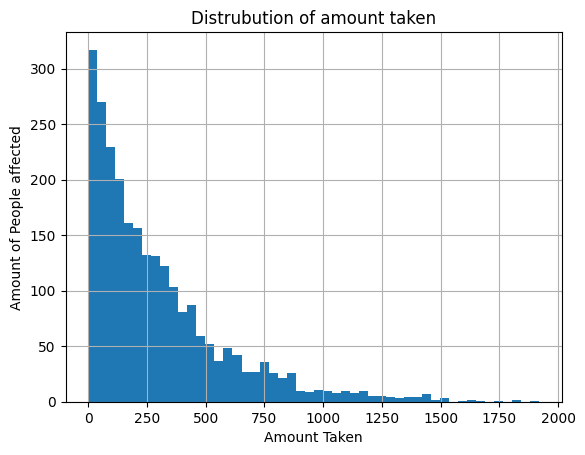

In [24]:
df['TransactionAmount'].hist(bins=50)
plt.title("Distrubution of amount taken")
plt.xlabel("Amount Taken")
plt.ylabel("Amount of People affected")


### Returns the average amount for the transactions for each credit and debit

In [25]:
#code here 
average_amounts = df.groupby('TransactionType')['TransactionAmount'].mean()
print("The average amount for each credit and debit:")
print(average_amounts.round(2))
print()

print("The amount of transactions for credit and debit ")
print(df['TransactionType'].value_counts())

The average amount for each credit and debit:
TransactionType
Credit    306.50
Debit     294.99
Name: TransactionAmount, dtype: float64

The amount of transactions for credit and debit 
TransactionType
Debit     1944
Credit     568
Name: count, dtype: int64


### United States cities which were most and least effected

In [26]:
#code here 
cities_effected=df['Location'].value_counts()
print('5 most effected cities')
print(cities_effected.head())
print()
print('Least 5 cities effected')
print(cities_effected.tail())

5 most effected cities
Location
Fort Worth       70
Los Angeles      69
Oklahoma City    68
Charlotte        68
Philadelphia     67
Name: count, dtype: int64

Least 5 cities effected
Location
Dallas         49
Washington     48
El Paso        46
Portland       42
Albuquerque    41
Name: count, dtype: int64


### Returns  the average account balance ,before any fraudelent transaction was made

In [27]:
#code here
originalAmount = df['TransactionAmount'] + df['AccountBalance']
originalAvg = originalAmount.mean()

print(f"The average account balance before any fraudulent transaction was made is: ${originalAvg:.2f}")

The average account balance before any fraudulent transaction was made is: $5411.90


### Occupation trends?

In [28]:
#code here
occupationCounts = df['CustomerOccupation'].value_counts()
print("Occupations and their counts:")
print(occupationCounts)

print()

occupationLoss = df.groupby('CustomerOccupation')['TransactionAmount'].mean().sort_values(ascending=False)
print("Average amount lost per occupation :")
print(occupationLoss.round(2))

Occupations and their counts:
CustomerOccupation
Student     657
Doctor      631
Engineer    625
Retired     599
Name: count, dtype: int64

Average amount lost per occupation :
CustomerOccupation
Student     313.22
Retired     294.53
Doctor      292.70
Engineer    289.04
Name: TransactionAmount, dtype: float64


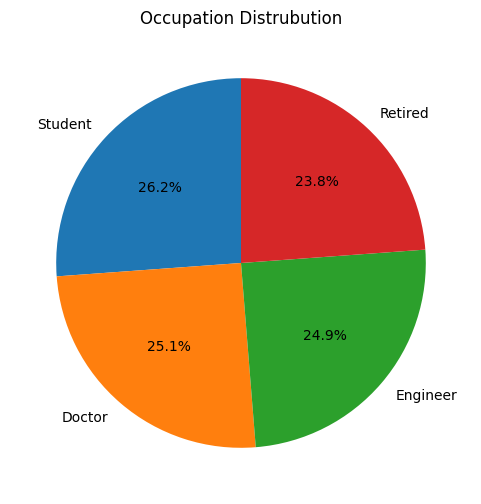

In [29]:
plt.figure(figsize = (6,6))
plt.pie(occupationCounts, labels = occupationCounts.index, autopct= '%1.1f%%', startangle= 90)
plt.title('Occupation Distrubution')
plt.show()

### What was the oldest, youngest, and average age of the Victims

In [30]:
#code here 

oldest_age = df['CustomerAge'].max()
youngest_age = df['CustomerAge'].min()
average_age = df['CustomerAge'].mean()

print(f"The oldest victim is: {oldest_age}")
print(f"The youngest victim: {youngest_age}")
print(f"The average age of the victims is: {average_age:.2f}")

print()
print("The top and bottom 5 age groups with the highest average transaction amount:")
age_group = df.groupby('CustomerAge')['TransactionAmount'].mean().sort_values(ascending=False)
print(age_group.head().round(2))
print()
print(age_group.tail().round(2))


The oldest victim is: 80
The youngest victim: 18
The average age of the victims is: 44.67

The top and bottom 5 age groups with the highest average transaction amount:
CustomerAge
61    465.96
60    422.39
78    414.88
29    404.45
65    380.59
Name: TransactionAmount, dtype: float64

CustomerAge
77    216.69
76    197.20
49    190.33
71    186.89
38    177.68
Name: TransactionAmount, dtype: float64


###  How many transactions were made from each the ATM, online, and branch from greatest to least

In [31]:
#code here 
channel_type=df['Channel'].value_counts()
print(channel_type)

Channel
Branch    868
ATM       833
Online    811
Name: count, dtype: int64


### What was the average for each channel: ATM, online, and branch

In [32]:
#code here 

channel_avg= df.groupby('Channel')['TransactionAmount'].mean()
print(channel_avg.round(2))

Channel
ATM       307.72
Branch    288.23
Online    297.21
Name: TransactionAmount, dtype: float64


### What was the average time in which these transactions lasted

In [33]:
#code here
avgDuration = df['TransactionDuration'].mean()
longestDuration = df['TransactionDuration'].max()
shortestDuration = df['TransactionDuration'].min()

print(f"The average transaction duration is: {avgDuration:.2f} seconds")
print(f"The longest transaction duration is: {longestDuration} seconds")
print(f"The shortest transaction duration is: {shortestDuration} seconds")

The average transaction duration is: 119.64 seconds
The longest transaction duration is: 300 seconds
The shortest transaction duration is: 10 seconds


### What was the average number of login attempts made before the transaction

In [34]:
#code here
avgAttempts = df['LoginAttempts'].mean()
print(f"The average number of login attempts made before the transaction is: {avgAttempts:.2f}")

The average number of login attempts made before the transaction is: 1.12


### Correlation Heatmap

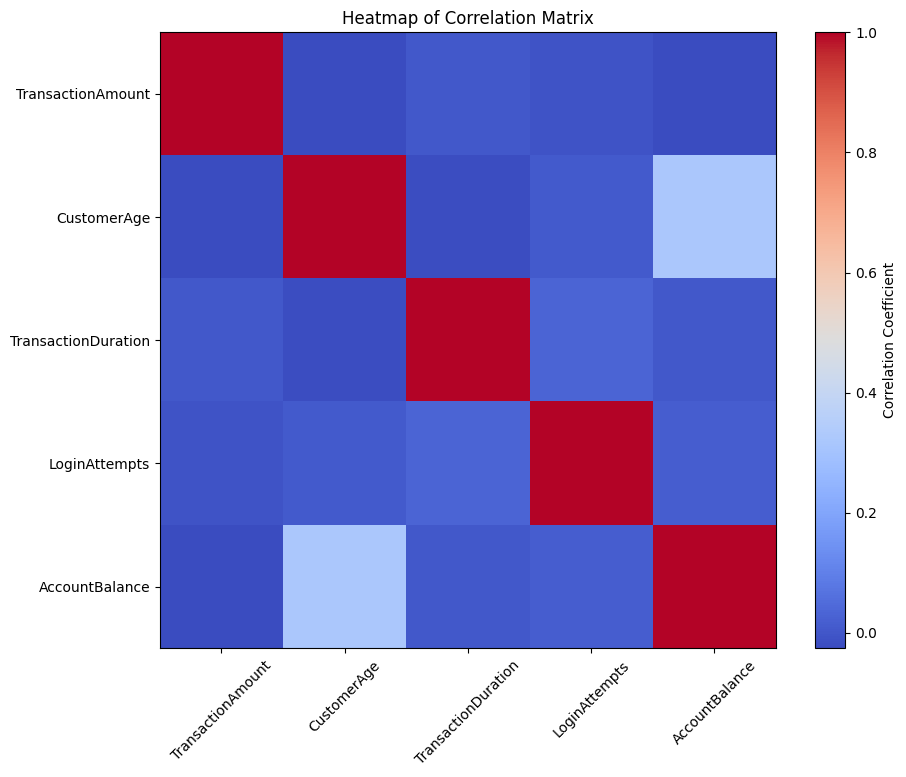

In [35]:
plt.figure(figsize=(10, 8))
plt.title("Heatmap of Correlation Matrix")
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.index)), correlation_matrix.index)
plt.show()